To know all the details about SHAP:
[SHAP Analysis](https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/)

Performance metrics as per updates:
- MSE
- MAE
- MedAE
- NSE
- KGE
- R squared

In [2]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
import shap
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'chemalldata.csv'
df = pd.read_csv(file_path)

**RANDOMFOREST**

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import numpy as np

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate KGE
def kge(y_true, y_pred):
    rho = np.corrcoef(y_true, y_pred)[0, 1]  # Pearson correlation coefficient
    alpha = np.mean(y_pred) / np.mean(y_true)  # Bias
    beta = np.std(y_pred) / np.std(y_true)    # Variability
    return 1 - np.sqrt((rho - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

kge_value = kge(y_test, y_pred)

# Calculate NSE
def nse(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

nse_value = nse(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {medae}")
print(f"RMSE: {rmse} ")
print(f"KGE: {kge_value} ")
print(f"NSE: {nse_value} ")

R2 Score: 0.9916366909662615
Mean Squared Error: 5.2268911410526355
Mean Absolute Error: 1.5863421052631572
Median Absolute Error: 1.0229999999999961
RMSE: 2.2862395196157017 
KGE: 0.9892383459526585 
NSE: 0.9916366909662615 


In [6]:
y_test.head()

184    54.0
163    72.0
18     98.0
15     86.0
67     90.0
Name: Rem, dtype: float64

*ScatterPlot*

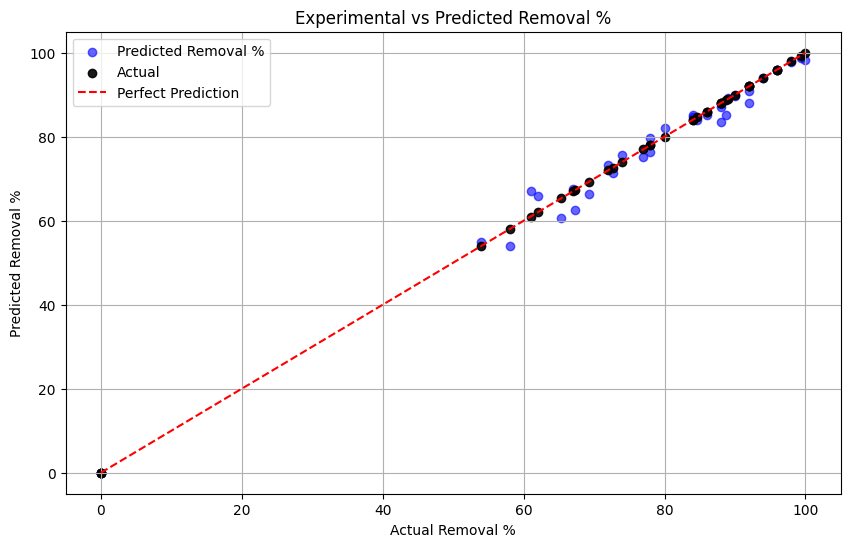

In [8]:
# Scatter plot of Experimental vs Predicted Removal % with regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Convert y_test and y_pred to numerical type if they are not already
y_test_num = y_test.astype(float)  # Convert to float if necessary
y_pred_num = y_pred.astype(float)  # Convert to float if necessary

plt.scatter(y_test_num, y_pred_num, alpha=0.6, color='b', label='Predicted Removal %')
plt.scatter(y_test_num, y_test_num, alpha=0.9, color='black', label='Actual')
plt.plot([min(y_test_num), max(y_test_num)], [min(y_test_num), max(y_test_num)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Removal %')
plt.ylabel('Predicted Removal %')
plt.title('Experimental vs Predicted Removal %')
plt.legend()
plt.grid(True)
plt.show()

*Residual Plot*

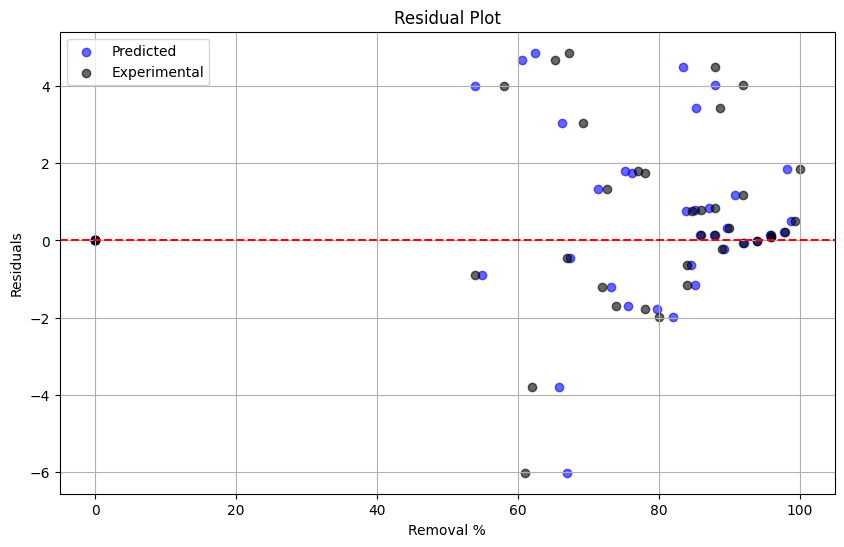

In [9]:
# Residual plot with predicted and experimental Removal (%)
residuals = y_test.astype(float) - y_pred  # Convert y_test to float before subtraction
plt.figure(figsize=(10, 6))

# Blue dots for predicted Removal (%)
plt.scatter(y_pred, residuals, alpha=0.6, color='b', label='Predicted')

# Black dots for experimental Removal (%)
plt.scatter(y_test.astype(float), residuals, alpha=0.6, color='k', label='Experimental') # Also convert here for consistency

# Horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Removal %')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

*Code to save the actual and predicted values in excel sheet for further plotting*

In [10]:
results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# Save the DataFrame to a CSV file
results_df.to_csv('y_test_vs_y_pred.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


*Beeswarm Plot*

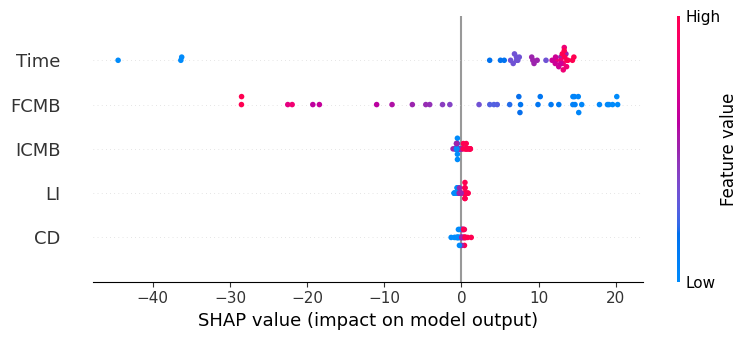

<Figure size 640x480 with 0 Axes>

In [12]:
# SHAP summary plot
explainer = shap.TreeExplainer(rf_regressor)
single_shap_value = explainer(X_test)

# Plot SHAP values
shap.summary_plot(single_shap_value, feature_names =  X_test.columns)
fig = plt.gcf()
plt.show
fig.savefig('shap_summary_plot_RF.png')

In [16]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.2 MB/s eta 0:00:00


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

**GRADIENT BOOSTING**

In [18]:
# Separate features and target
X = df.drop('Rem', axis=1)
y = df['Rem']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GradientBoostingRegressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate KGE
def kge(y_true, y_pred):
    rho = np.corrcoef(y_true, y_pred)[0, 1]  # Pearson correlation coefficient
    alpha = np.mean(y_pred) / np.mean(y_true)  # Bias
    beta = np.std(y_pred) / np.std(y_true)    # Variability
    return 1 - np.sqrt((rho - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

kge_value = kge(y_test, y_pred)

# Calculate NSE
def nse(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

nse_value = nse(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {medae}")
print(f"RMSE: {rmse} ")
print(f"KGE: {kge_value} ")
print(f"NSE: {nse_value} ")

R2 Score: 0.9909218351185335
Mean Squared Error: 5.673660916334818
Mean Absolute Error: 1.6441481343777447
Median Absolute Error: 1.037331257916854
RMSE: 2.3819447760884 
KGE: 0.9863208124290921 
NSE: 0.9909218351185335 


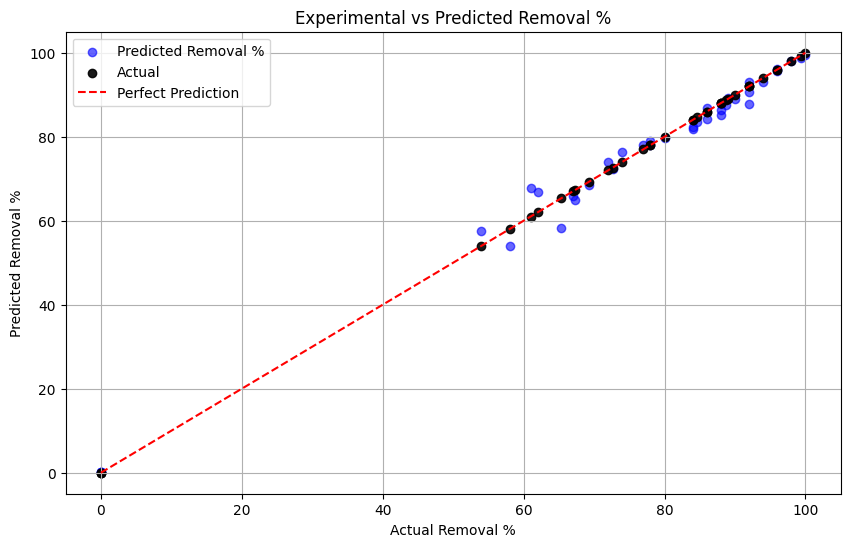

In [19]:
# Scatter plot of Experimental vs Predicted Removal % with regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Convert y_test and y_pred to numerical type if they are not already
y_test_num = y_test.astype(float)  # Convert to float if necessary
y_pred_num = y_pred.astype(float)  # Convert to float if necessary

plt.scatter(y_test_num, y_pred_num, alpha=0.6, color='b', label='Predicted Removal %')
plt.scatter(y_test_num, y_test_num, alpha=0.9, color='black', label='Actual')
plt.plot([min(y_test_num), max(y_test_num)], [min(y_test_num), max(y_test_num)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Removal %')
plt.ylabel('Predicted Removal %')
plt.title('Experimental vs Predicted Removal %')
plt.legend()
plt.grid(True)
plt.show()

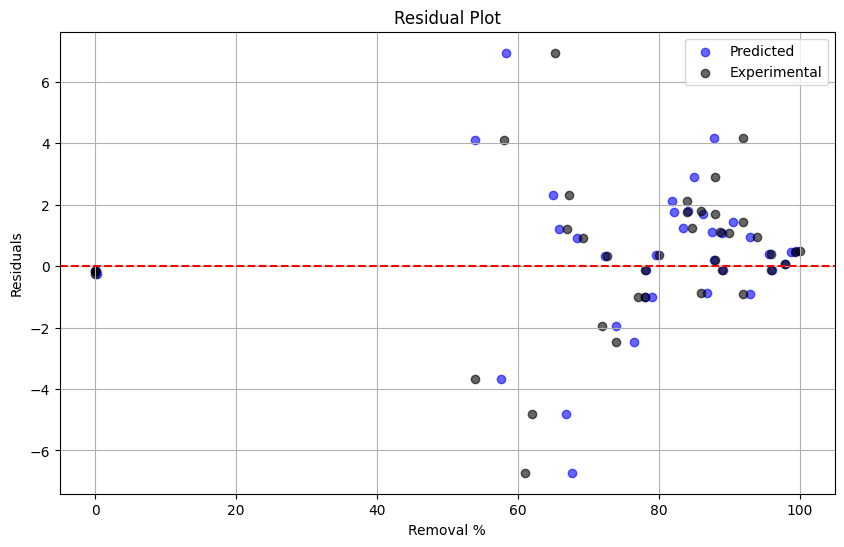

In [20]:
# Residual plot with predicted and experimental Removal (%)
residuals = y_test.astype(float) - y_pred  # Convert y_test to float before subtraction
plt.figure(figsize=(10, 6))

# Blue dots for predicted Removal (%)
plt.scatter(y_pred, residuals, alpha=0.6, color='b', label='Predicted')

# Black dots for experimental Removal (%)
plt.scatter(y_test.astype(float), residuals, alpha=0.6, color='k', label='Experimental') # Also convert here for consistency

# Horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Removal %')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
results_df1 = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# Save the DataFrame to a CSV file
results_df1.to_csv('y_test_vs_y_pred_gradientboost.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


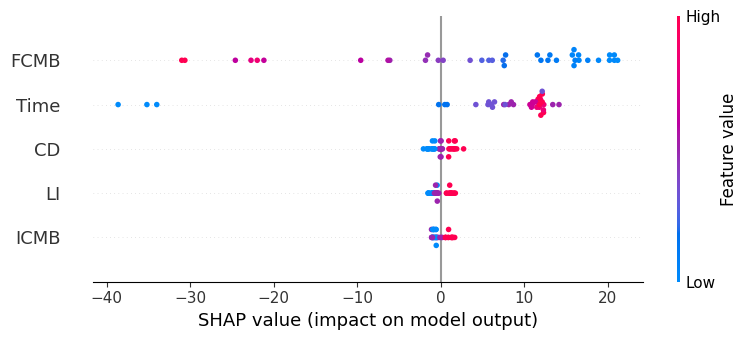

<function matplotlib.pyplot.show(close=None, block=None)>

In [22]:
# SHAP summary plot
explainer = shap.TreeExplainer(model)
single_shap_value = explainer(X_test)

# Plot SHAP values
shap.summary_plot(single_shap_value, feature_names =  X_test.columns)
#fig = plt.gcf()
plt.show
#fig.savefig('shap_summary_plot_RF.png')

**XGBOOST**

In [24]:
from xgboost import XGBRegressor

# Separate features and target
X = df.drop('Rem', axis=1)
y = df['Rem']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate KGE
def kge(y_true, y_pred):
    rho = np.corrcoef(y_true, y_pred)[0, 1]  # Pearson correlation coefficient
    alpha = np.mean(y_pred) / np.mean(y_true)  # Bias
    beta = np.std(y_pred) / np.std(y_true)    # Variability
    return 1 - np.sqrt((rho - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

kge_value = kge(y_test, y_pred)

# Calculate NSE
def nse(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

nse_value = nse(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {medae}")
print(f"RMSE: {rmse} ")
print(f"KGE: {kge_value} ")
print(f"NSE: {nse_value} ")

R2 Score: 0.9932346267985578
Mean Squared Error: 4.228215065338316
Mean Absolute Error: 1.4507778823199242
Median Absolute Error: 0.9210968017578125
RMSE: 2.056262401868574 
KGE: 0.989090272294085 
NSE: 0.9932346267985578 


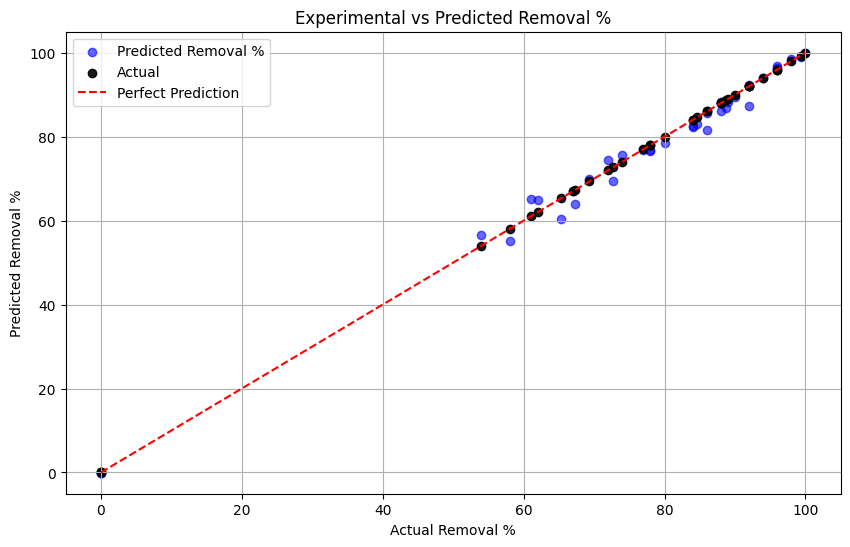

In [25]:
# Scatter plot of Experimental vs Predicted Removal % with regression line
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Convert y_test and y_pred to numerical type if they are not already
y_test_num = y_test.astype(float)  # Convert to float if necessary
y_pred_num = y_pred.astype(float)  # Convert to float if necessary

plt.scatter(y_test_num, y_pred_num, alpha=0.6, color='b', label='Predicted Removal %')
plt.scatter(y_test_num, y_test_num, alpha=0.9, color='black', label='Actual')
plt.plot([min(y_test_num), max(y_test_num)], [min(y_test_num), max(y_test_num)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Removal %')
plt.ylabel('Predicted Removal %')
plt.title('Experimental vs Predicted Removal %')
plt.legend()
plt.grid(True)
plt.show()

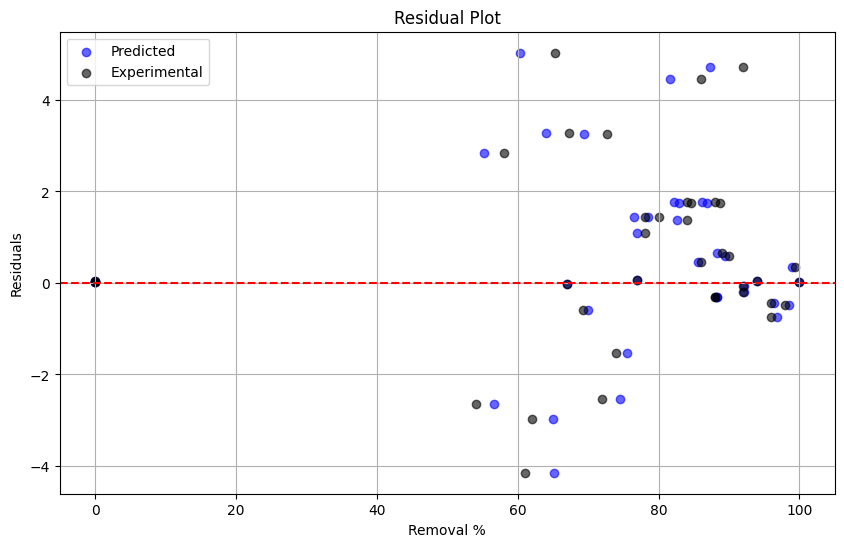

In [26]:
# Residual plot with predicted and experimental Removal (%)
residuals = y_test.astype(float) - y_pred  # Convert y_test to float before subtraction
plt.figure(figsize=(10, 6))

# Blue dots for predicted Removal (%)
plt.scatter(y_pred, residuals, alpha=0.6, color='b', label='Predicted')

# Black dots for experimental Removal (%)
plt.scatter(y_test.astype(float), residuals, alpha=0.6, color='k', label='Experimental') # Also convert here for consistency

# Horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Removal %')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
results_df2 = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# Save the DataFrame to a CSV file
results_df2.to_csv('y_test_vs_y_pred_xgboost.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


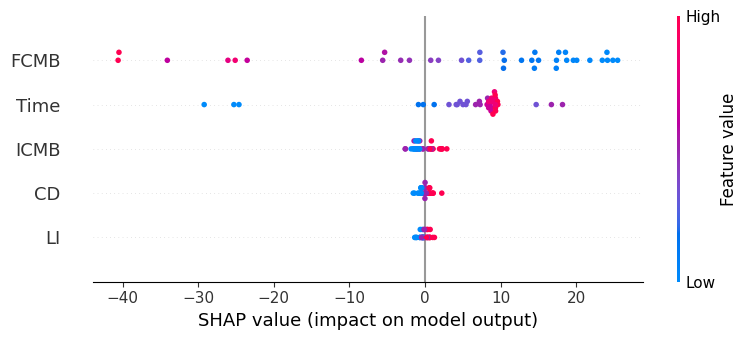

<function matplotlib.pyplot.show(close=None, block=None)>

In [28]:
# SHAP summary plot(beeswarm)
explainer = shap.TreeExplainer(model)
single_shap_value = explainer(X_test)

# Plot SHAP values
shap.summary_plot(single_shap_value, feature_names =  X_test.columns)
#fig = plt.gcf()
plt.show
#fig.savefig('shap_summary_plot_RF.png')

**LIGHTBOOST/LIGHTGBM**